# Problem Set 3

## Question 1

### Step 1 - Import the necessary libraries

In [1]:
import pandas as pd

### Step 2 - Import the dataset 

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

### Step 3 - Assign it to a variable called users

In [3]:
users = pd.read_csv(url, delimiter='|')

### Step 4 - finding the mean age per occupation

In [4]:
mean_age = users.groupby('occupation')['age'].mean()
print(mean_age)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


### Step 5 -  finding the male ratio per occupation, sorting from most to least

In [5]:
users['male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio = users.groupby('occupation')['male'].mean().sort_values(ascending=False)
print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male, dtype: float64


### Step 6 - calculating the minimum and maximum ages for each occupation

In [6]:
min_max = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


### Step 7 - calculate the mean age for each combination of occupation and sex

In [7]:
mean_age = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8 - display the percentage of women and men for each occupation

In [9]:
count = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
percent = count.div(count.sum(axis=1), axis=0) * 100
print(percent)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


## Question 2

### Step 1 - Import the necessary libraries

In [10]:
import pandas as pd

### Step 2 - Import the dataset from this address

In [11]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

### Step 3 - Assign it to a variable called euro

In [12]:
euro = pd.read_csv(url)

### Step 4 - Selecting only the Goal column

In [13]:
goals = euro['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


### Step 5 - Display teams participated in the Euro2012

In [14]:
num_teams = euro['Team'].nunique()
print(num_teams)

16


### Step 6 - Display number of columns in the dataset

In [15]:
num_columns = euro.shape[1]
print(num_columns)

35


### Step 7 - View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [16]:
discipline = euro[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


### Step 8 - Sort the teams by Red Cards, then to Yellow Cards

In [17]:
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print(sorted_teams)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


### Step 9 - Calculate the mean Yellow Cards given per Team

In [18]:
mean_y = discipline['Yellow Cards'].mean()
print(mean_y)

7.4375


### Step 10 - Filter teams that scored more than 6 goals

In [20]:
teams_more_than_6_goals = euro[euro['Goals'] > 6]
print(teams_more_than_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

### Step 11 - Select the teams that start with G

In [21]:
teams_starting_with_G = euro[euro['Team'].str.startswith('G')]
print(teams_starting_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


### Step 12 - Select the first 7 columns

In [23]:
_7_columns = euro.iloc[:, :7]
print(_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 13 - Select all columns except the last 3

In [24]:
except_last_3 = euro.iloc[:, :-3]
print(except_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 14 - Present only the Shooting Accuracy from England, Italy and Russia

In [26]:
selected_teams = euro.loc[euro['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(selected_teams)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3

### Step 1 - Import the necessary libraries

In [27]:
import pandas as pd
import numpy as np


### Step 2 - Create 3 differents Series, each of length 100

In [28]:
np.random.seed(60)  

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

### Step 3 - Create a DataFrame by joining the Series by column

In [29]:
df = pd.concat([series1, series2, series3], axis=1)

### Step 4 - Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [30]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

### Step 5 - Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [31]:
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))

### Step 6 - Oops it seems it is going only until index 99. Is it true?

In [32]:
print(bigcolumn.index)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)


### Yes, it is true. It runs until 99

### Step 7 - Reindex the DataFrame so it goes from 0 to 299

In [33]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn = bigcolumn.reindex(range(300))
print(bigcolumn)

         0
0        2
1        2
2        3
3        3
4        4
..     ...
295  23208
296  16117
297  18491
298  15217
299  21789

[300 rows x 1 columns]


## Question 4

### Step 1 - Import the necessary libraries

In [34]:
import pandas as pd
import numpy as np

### Step 2 - Import the dataset from the attached file wind.txt
### Step 3 - Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [36]:
data = pd.read_csv('wind.txt', delim_whitespace=True)

print("DataFrame:")
print(data.head())

data['year'] = data['Yr'] + 1900

data.rename(columns={'Mo': 'month', 'Dy': 'day'}, inplace=True)

print("\nColumns after renaming and year adjustment:")
print(data.columns)

print("\nYear Range:")
print(f"Min: {data['year'].min()}, Max: {data['year'].max()}")

print("\nMonth Range:")
print(f"Min: {data['month'].min()}, Max: {data['month'].max()}")

print("\nDay Range:")
print(f"Min: {data['day'].min()}, Max: {data['day'].max()}")

valid_years = (data['year'] >= 1900) & (data['year'] <= 2100)
valid_months = (data['month'] >= 1) & (data['month'] <= 12)
valid_days = (data['day'] >= 1) & (data['day'] <= 31)

data = data[valid_years & valid_months & valid_days]

print("\nFiltered DataFrame:")
print(data)

data['Date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

data.dropna(subset=['Date'], inplace=True)

data.drop(columns=['year', 'month', 'day', 'Yr'], inplace=True)

data.set_index('Date', inplace=True)

print("\nFinal DataFrame with Date as index:")
print(data)


DataFrame:
   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  

Columns after renaming and year adjustment:
Index(['Yr', 'month', 'day', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL', 'year'],
      dtype='object')

Year Range:
Min: 1961, Max: 1978

Month Range:
Min: 1, Max: 12

Day Range:
Min: 1, Max: 31

Filtered DataFrame:
      Yr  month  day    RPT    VAL    ROS    KIL    SHA

### Step 4 - Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [37]:
def fix_year(x):
    if x.year > 1989:
        return x.replace(year=x.year-100)
    else:
        return x

data.index = data.index.map(fix_year)


### Step 5 - Set the right dates as the index

In [38]:
print(data.index.dtype) 


datetime64[ns]


### Step 6 - Compute how many values are missing for each location

In [39]:
missing_values = data.isnull().sum()
print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


### Step 7 - Compute how many non-missing values

In [40]:
non_missing_values = data.notnull().sum().sum()
print(non_missing_values)

78857


### Step 8 - Calculate the mean windspeeds of the windspeeds over all the locations

In [41]:
overall_mean = data.mean().mean()
print(overall_mean)


10.227982360836938


### Step 9 - Create a DataFrame called loc_stats and calculate the min, max, mean  and standard deviations of the windspeeds at each location

In [42]:
loc_stats = data.describe().loc[['min', 'max', 'mean', 'std']]
print(loc_stats)

            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


### Step 10 - Create a DataFrame called day_stats and calculate the min, max, mean and standard deviations of the windspeeds across all the locations at each day

In [43]:
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
print(day_stats.head()) 


             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356


### Step 11 - Find the average windspeed in January

In [45]:
january = data[data.index.month == 1].mean()
print(january)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


### Step 12 - Downsample the record to a yearly frequency

In [46]:
yearly = data.resample('Y').mean()
print(yearly)


                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

### Step 13 - Downsample the record to a monthly frequency

In [47]:
monthly = data.resample('M').mean()
print(monthly)


                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

### Step 14 - Downsample the record to a weekly frequency

In [48]:
weekly = data.resample('W').mean()
print(weekly)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

### Step 15 - Calculate the min, max, mean and standard deviations of the windspeeds across all locations for each week

In [50]:
weekly_stats = pd.DataFrame({
    'min': weekly.min(axis=1),
    'max': weekly.max(axis=1),
    'mean': weekly.mean(axis=1),
    'std': weekly.std(axis=1)
})

weekly_stats = weekly_stats.iloc[:52]
print(weekly_stats)


                  min        max       mean       std
Date                                                 
1961-01-01   9.290000  18.500000  13.018182  2.808875
1961-01-08   6.417143  13.541429   9.847659  2.601705
1961-01-15   4.630000  12.468571   8.353214  2.719649
1961-01-22   6.328571  13.204286   9.368413  2.224531
1961-01-29  12.720000  22.530000  16.958095  2.915635
1961-02-05   8.247143  16.827143  11.800357  2.807310
1961-02-12  10.774286  21.832857  15.891548  3.147412
1961-02-19   9.542857  21.167143  13.726825  3.105819
1961-02-26   8.524286  16.304286  12.604286  2.364323
1961-03-05   7.834286  17.842857  11.766766  2.535336
1961-03-12   6.881429  16.701429  10.612579  2.746233
1961-03-19   7.084286  19.350000  11.756310  3.320318
1961-03-26   6.648571  18.134286  10.462857  3.071975
1961-04-02   7.300000  13.900000  10.268433  1.883742
1961-04-09   5.958571  13.607143   9.412381  2.399840
1961-04-16   4.947143   9.482857   6.845595  1.803831
1961-04-23   7.768571  13.62

## Question 5

### Step 1 - Import the necessary libraries

In [51]:
import pandas as pd
import numpy as np

### Step 2 - Import the dataset from this address

In [52]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3 - Assign it to a variable called chipo

In [53]:
chipo = pd.read_csv(url, sep='\t')

### Step 4 - See the first 10 entries

In [54]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5 - displaying number of observations in the dataset

In [55]:
print(chipo.shape[0])


4622


### Step 6 - displaying number of columns in the dataset

In [56]:
print(chipo.shape[1])


5


### Step 7 - Print the name of all the columns

In [57]:
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


### Step 8 - display the dataset indexed

In [58]:
print(chipo.index)


RangeIndex(start=0, stop=4622, step=1)


### Step 9 - display the most-ordered item

In [59]:
most_ordered_item = chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(1)
print(most_ordered_item)


              quantity
item_name             
Chicken Bowl       761


### Step 10 - For the most-ordered item, display number of items were ordered

In [60]:
print(most_ordered_item['quantity'].values[0])


761


### Step 11 - display the most ordered item in the choice_description column

In [61]:
most_ordered_choice = chipo.groupby('choice_description').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(1)
print(most_ordered_choice)

                    quantity
choice_description          
[Diet Coke]              159


### Step 12 - display number of items ordered in total

In [62]:
total_items = chipo['quantity'].sum()
print(total_items)

4972


### Step 13 - Turn the item price into a float, Check the item price type, Create a lambda function and change the type of item price, Check the item price type

In [63]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print(chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print(chipo['item_price'].dtype)


float64
float64


### Step 14 - display the revenue for the period in the dataset

In [64]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Revenue: ${revenue:.2f}")


Revenue: $39237.02


### Step 15 - display the number of orders made in the period

In [65]:
total_orders = chipo['order_id'].nunique()
print(total_orders)


1834


### Step 16 - display the average revenue amount per order

In [66]:
average_revenue_per_order = revenue / total_orders
print(f"Average revenue per order: ${average_revenue_per_order:.2f}")


Average revenue per order: $21.39


### Step 17 - display different items sold

In [67]:
items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", items_sold)

Number of different items sold: 50


## Question 6

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


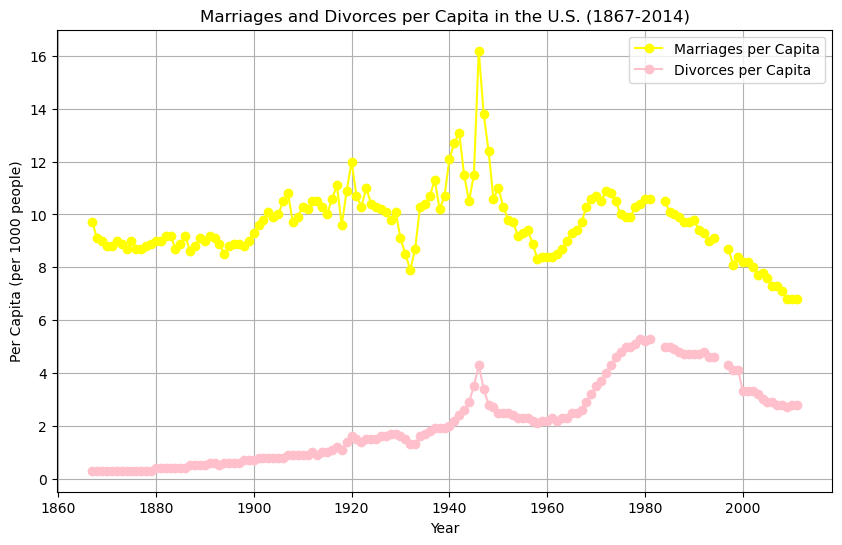

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

print(data.head())

plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per Capita', color='yellow', linestyle='-', marker='o')

plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per Capita', color='pink', linestyle='-', marker='o')

plt.xlabel('Year')
plt.ylabel('Per Capita (per 1000 people)')

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.legend()

plt.grid(True)

plt.show()


## Question 7

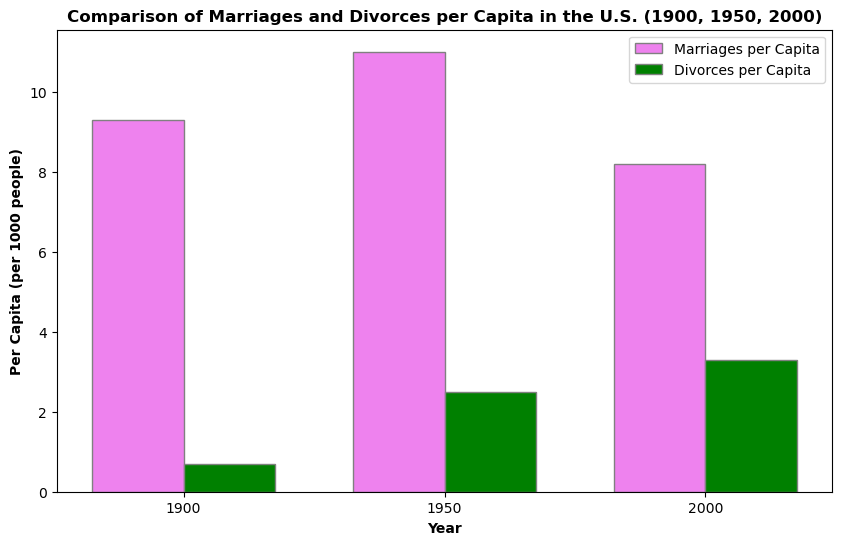

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

filtered_data = data[(data['Year'] == 1900) | (data['Year'] == 1950) | (data['Year'] == 2000)]

bar_width = 0.35
r1 = range(len(filtered_data))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

plt.bar(r1, filtered_data['Marriages_per_1000'], color='violet', width=bar_width, edgecolor='grey', label='Marriages per Capita')
plt.bar(r2, filtered_data['Divorces_per_1000'], color='green', width=bar_width, edgecolor='grey', label='Divorces per Capita')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Per Capita (per 1000 people)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(filtered_data))], ['1900', '1950', '2000'])

plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontweight='bold')

plt.legend()

plt.show()

## Question 8

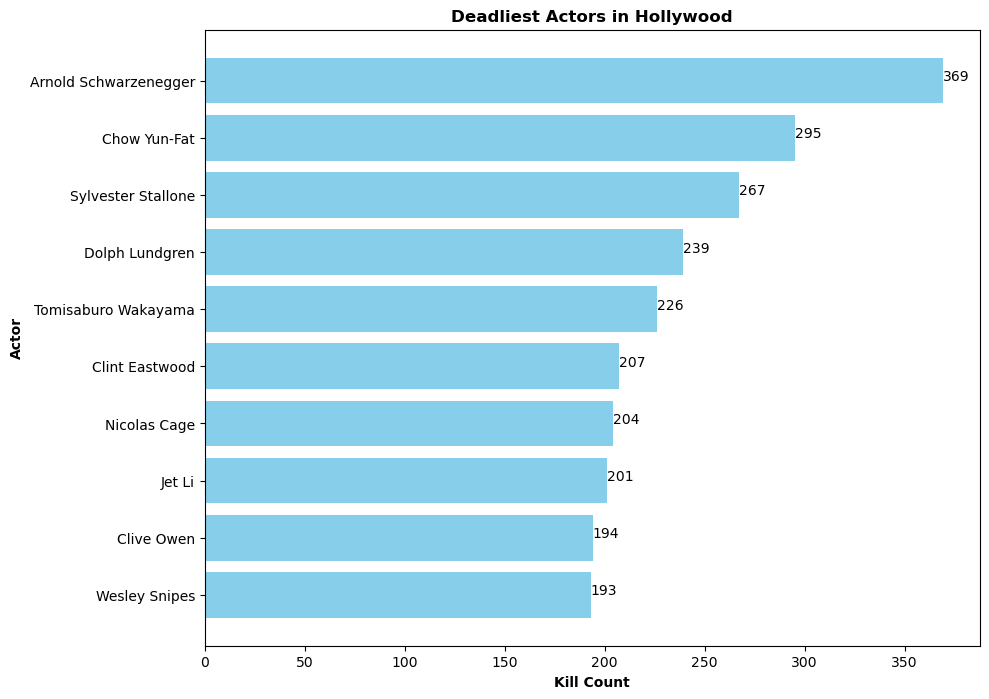

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'actor_kill_counts.csv'
data = pd.read_csv(file_path)

data_sorted = data.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 8))

plt.barh(data_sorted['Actor'], data_sorted['Count'], color='skyblue')

plt.xlabel('Kill Count', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Deadliest Actors in Hollywood', fontweight='bold')

for index, value in enumerate(data_sorted['Count']):
    plt.text(value, index, str(value))

plt.show()

## Question 9

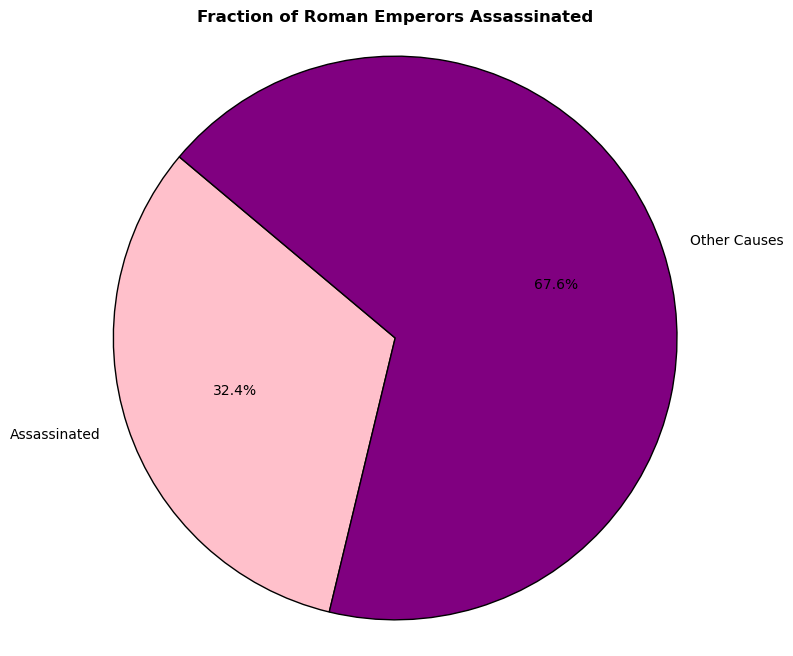

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'roman-emperor-reigns.csv'
data = pd.read_csv(file_path)

assassinated = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
total = data.shape[0]
other_deaths = total - assassinated

labels = ['Assassinated', 'Other Causes']
sizes = [assassinated, other_deaths]
colors = ['pink', 'purple']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')

plt.title('Fraction of Roman Emperors Assassinated', fontweight='bold')

plt.show()


## Question 10

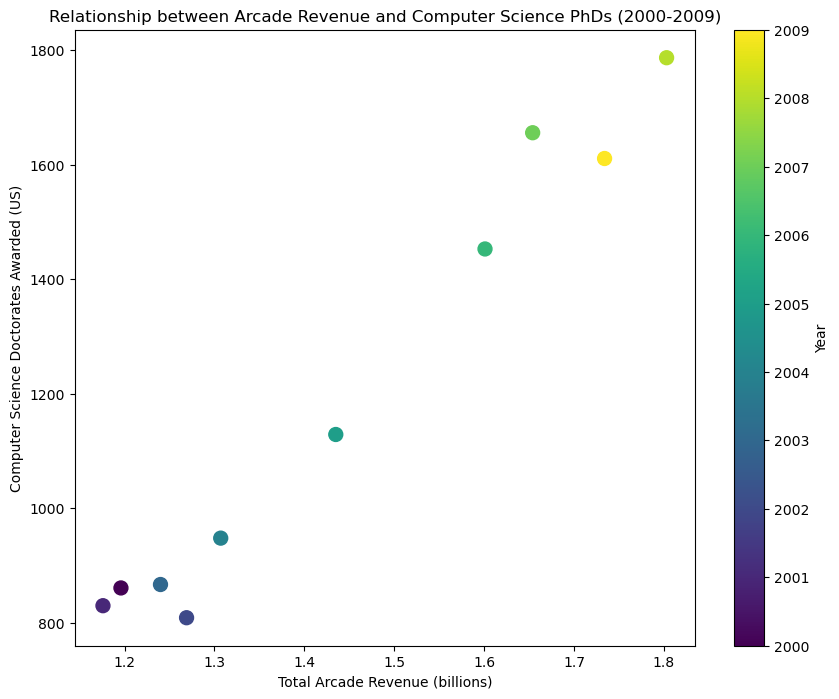

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)

filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(filtered_data['Total Arcade Revenue (billions)'], 
                      filtered_data['Computer Science Doctorates Awarded (US)'], 
                      c=filtered_data['Year'], cmap='viridis', s=100)

plt.colorbar(scatter, label='Year')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')

plt.show()


### Step 1 - Import the necessary libraries